# AR 알고리즘으로 시계열 데이터 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Superstore.xls',index_col=0)

In [3]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [7]:
data = data[data['Category'] == 'Furniture']

In [8]:
data = data[['Order Date','Sales']]

In [9]:
data.sort_values('Order Date') #sort_values는 오래된 날짜 부터 오름차순으로 날짜 정렬해줌

,Order Date,Sales
Row ID,,
7475,2014-01-06,2573.820
7661,2014-01-07,76.728
867,2014-01-10,51.940
717,2014-01-11,9.940
2979,2014-01-13,545.940
...,...,...
7637,2017-12-29,258.750
7633,2017-12-29,1207.840
5132,2017-12-29,101.120


In [10]:
data = data.groupby('Order Date').sum()

In [11]:
data

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [12]:
data.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

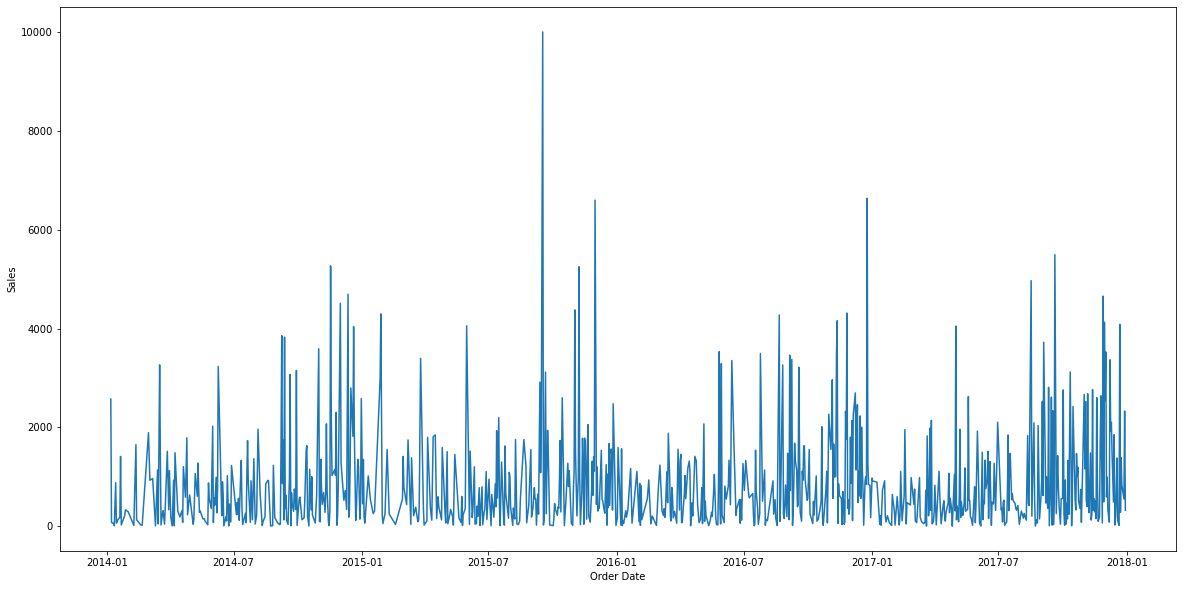

In [13]:
# 방법1
plt.figure(figsize=(20,10))
sns.lineplot(x= data.index, y = data['Sales'])

<AxesSubplot:xlabel='Order Date'>

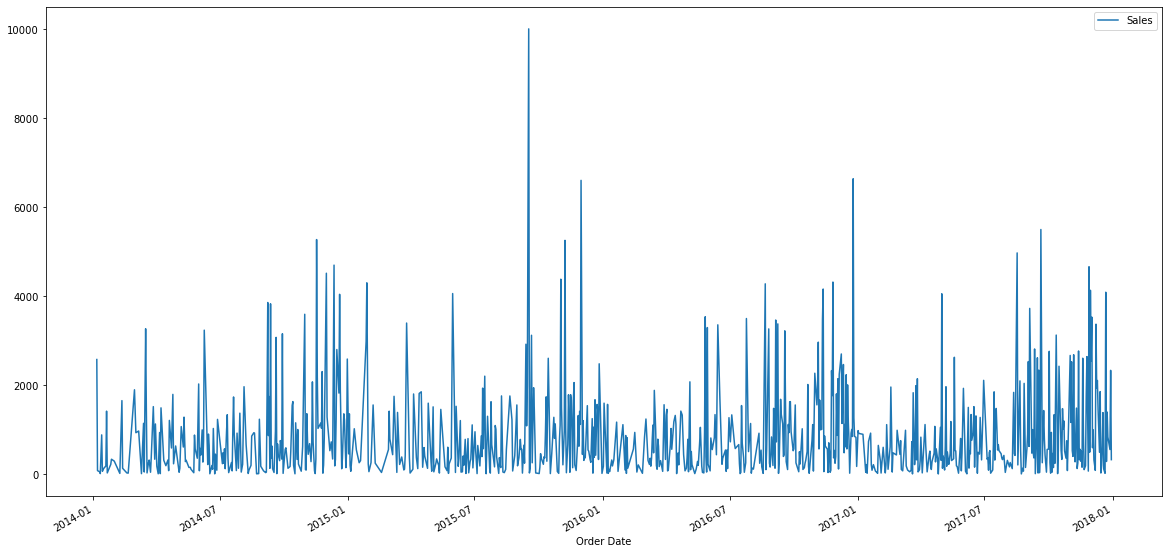

In [14]:
#방법2
data.plot(figsize=(20,10))

In [15]:
data = data.resample('MS').mean() #월달로 나열(MS)

In [16]:
data

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049187
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


In [18]:
new_df = data[:'2016']

In [19]:
from statsmodels.tsa.ar_model import AutoReg

In [20]:
model = AutoReg(new_df, lags =12)#12개월 

C:\Users\MyCom\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [22]:
model_fit = model.fit()

In [24]:
len(new_df)

36

In [26]:
pred = model_fit.predict(start = len(new_df), end = len(new_df)+11) #

In [28]:
pred

2017-01-01     660.758250
2017-02-01     310.973369
2017-03-01     433.467903
2017-04-01     589.733771
2017-05-01     634.609408
2017-06-01     932.697417
2017-07-01     959.741129
2017-08-01     983.674137
2017-09-01     989.383080
2017-10-01     554.888314
2017-11-01    1030.961310
2017-12-01    1194.389892
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Order Date'>

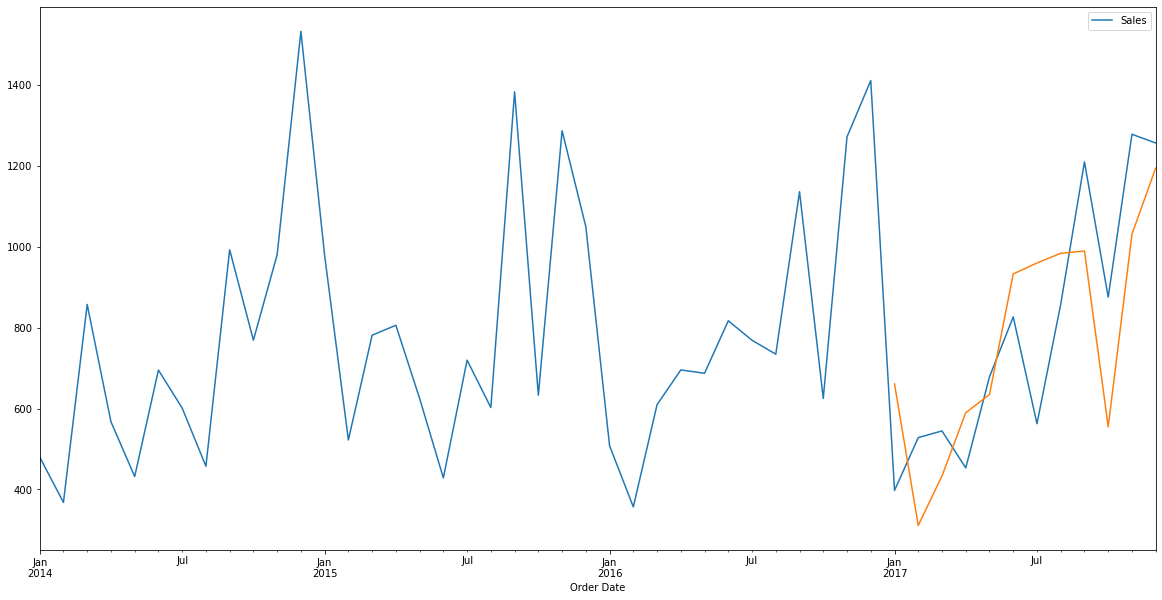

In [29]:
ax = data.plot()
pred.plot(ax=ax, figsize=(20,10))

- Time series  구성요소





(1) 추세 요인 (Trend factor) 은 인구의 변화, 자원의 변화, 자본재의 변화, 기술의 변화 등과 같은 요인들에 의해 영향을 받는 장기 변동 요인으로서, 급격한 충격이 없는 한 지속되는 특성이 있습니다. "10년 주기의 세계경제 변동 추세" 같은 것이 추세 요인의 예라고 할 수 있습니다. 



(2) 순환 요인 (Cycle factor) 은 경제활동의 팽창과 위축과 같이 불규칙적이며 반복적인 중기 변동요인을 말합니다. 주식투자가들이 "건설업/반도체업/조선업 순환주기"를 고려해서 투자한다고 말하는게 좋은 예입니다. 

만약 관측한 데이터셋이 10년 미만일 경우 추세 요인과 순환 요인을 구분하는 것이 매우 어렵습니다. 그래서 관측기간이 길지 않을 경우 추세와 순환 요인을 구분하지 않고 그냥 묶어서 추세 요인이라고 분석하기도 합니다. 



(3) 계절 요인 (Seasonal factor) 은 12개월(1년)의 주기를 가지고 반복되는 변화를 말하며, 계절의 변화, 공휴일의 반복, 추석 명절의 반복 등 과 같은 요인들에 의하여 발생합니다. 



(4) 불규칙 요인 (Irregular / Random factor, Noise) 은 일정한 규칙성을 인지할 수 없는 변동의 유형을 의미합니다. 천재지변, 전쟁, 질병 등과 같이 예 상할 수 없는 우연적 요인에 의해 발생되는 변동을 총칭합니다. 불규칙변동 은 경제활동에 미미한 영향을 미치기도 하지만 때로는 경제생활에 지대한 영향을 주기도 합니다. 


